In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    data_prefix = '/content/drive/My Drive/NLP'
except ModuleNotFoundError:
    data_prefix = '../Datasets/SO'

In [6]:
train = pd.read_parquet(os.path.join(data_prefix, 'train.parquet'))
test  = pd.read_parquet(os.path.join(data_prefix, 'test.parquet'))

In [7]:
train.head()

Body  \
Id                                                            
34862324  Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...   
47303682  While converting the data frame to HTML, Date ...   
46431243  <p>This should be an easy one, but somehow I c...   
45306324  <p>Let say I have a component in Angular 2 tha...   
49479547  <p>I'm setting a var using \n<code>set TEST_VA...   

                                                 Tags  \
Id                                                      
34862324           <java><algorithm><graph-algorithm>   
47303682                         <html><r><dataframe>   
46431243  <python><pandas><dataframe><pandas-groupby>   
45306324                  <angular><typescript><rxjs>   
49479547                     <c><windows><batch-file>   

                                                      Title  target  
Id                                                                   
34862324  I am implementing a Minimum Spanning Forrest a...       2  
47303682  R Studio: Date is getting converted to number,...       2  
46431243  Pandas - dataframe groupby - how to get sum of...       0  
45306324  Casting results from Observable.forkJoin to th...       0  
49479547  Environment variable set in batch file cannot ...       1

# Предварительная обработка данных

In [8]:
from data_preprocessing import remove_html_tags, stay_only_a_z, tokenize_by_word

In [9]:
'''
надо пересмотреть эту функцию


def clean_text(dataframe, field='text'):
    def clean_str(text): 
        text = text.lower()
        text = re.sub(r'[^(a-zA-Z)\s]','', text)
        return text
  dataframe[field] = data[field].apply(clean_str)
  return dataframe

data = clean_text(data)'''

"\nнадо пересмотреть эту функцию\n\n\ndef clean_text(dataframe, field='text'):\n    def clean_str(text): \n        text = text.lower()\n        text = re.sub(r'[^(a-zA-Z)\\s]','', text)\n        return text\n  dataframe[field] = data[field].apply(clean_str)\n  return dataframe\n\ndata = clean_text(data)"

## Демонстрация работы препроцессингов

In [10]:
remove_html_tags('''
<p>I am using nltk. However, I've just got up to the method like</p>

<pre><code>my_text = ['This', 'is', 'my', 'text']
</code></pre>

<p>I'd like to discover any way to input my "text" as:</p>

<pre><code>my_text = "This is my text, this is a nice way to input text."
</code></pre>
''')

/home/agladyshev/Documents/UNN/NLP/nlp_course/data_preprocessing.py:11: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 11 of the file /home/agladyshev/Documents/UNN/NLP/nlp_course/data_preprocessing.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  return BeautifulSoup(html).get_text()


'\nI am using nltk. However, I\'ve just got up to the method like\nmy_text = [\'This\', \'is\', \'my\', \'text\']\n\nI\'d like to discover any way to input my "text" as:\nmy_text = "This is my text, this is a nice way to input text."\n\n'

In [11]:
stay_only_a_z("Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n**output:** Set of MSTs T\r\n\r\n**begin*")

'Algorithmm\r\n\r\ninput  Graph G\r\n\r\noutput Set of MSTs T\r\n\r\nbegin'

In [12]:
tokenize_by_word("Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n**output:** Set of MSTs T\r\n\r\n**begin*")

'Algorithmm : ** input :** Graph G ** output :** Set of MSTs T ** begin *'

## Препроцессинг для Body

In [13]:
def body_preprocess(text):
#     text = remove_html_tags(text)
    text = stay_only_a_z(text)
    text = tokenize_by_word(text)
    return text.lower()

In [14]:
body_preprocess('''
Algorithmm:

**input :** Graph G

**output:** Set of MSTs T

**begin**

T=null;
E=G.Edges;

for all vertices in G,
Create a tree t having single vertex b

add t to T

end for

     repeat
        Find an edge e ∈ E having minimum weight
        such that one end belongs to t ∈ T and the other
        end does not belongs to any of the trees in T
        Add e to t
      until e = NULL

I'm stuck on the logic for the highlighted block.
I've used simple objects for vertex,edge and tree. And for their sets, used array of Objects.''')

'algorithmm input graph g output set of msts t begin tnull egedges for all vertices in g create a tree t having single vertex b add t to t end for repeat find an edge e e having minimum weight such that one end belongs to t t and the other end does not belongs to any of the trees in t add e to t until e null im stuck on the logic for the highlighted block ive used simple objects for vertexedge and tree and for their sets used array of objects'

### Выполним препроцессинг для данных

In [15]:
train['Body'] = train['Body'].apply(body_preprocess)
test ['Body'] = test ['Body'].apply(body_preprocess)

In [16]:
train.head()

Body  \
Id                                                            
34862324  algorithmm input graph g output set of msts t ...   
47303682  while converting the data frame to html date i...   
46431243  pthis should be an easy one but somehow i coul...   
45306324  plet say i have a component in angular that ne...   
49479547  pim setting a var using codeset testvarcode an...   

                                                 Tags  \
Id                                                      
34862324           <java><algorithm><graph-algorithm>   
47303682                         <html><r><dataframe>   
46431243  <python><pandas><dataframe><pandas-groupby>   
45306324                  <angular><typescript><rxjs>   
49479547                     <c><windows><batch-file>   

                                                      Title  target  
Id                                                                   
34862324  I am implementing a Minimum Spanning Forrest a...       2  
47303682  R Studio: Date is getting converted to number,...       2  
46431243  Pandas - dataframe groupby - how to get sum of...       0  
45306324  Casting results from Observable.forkJoin to th...       0  
49479547  Environment variable set in batch file cannot ...       1

## Препроцессинг для Title

In [17]:
def title_preprocessing(text):
    text = stay_only_a_z(text)
    text = tokenize_by_word(text)
    return text.lower()

In [18]:
train['Title'] = train['Title'].apply(title_preprocessing)
test ['Title'] = test ['Title'].apply(title_preprocessing)

In [19]:
train.head()

Body  \
Id                                                            
34862324  algorithmm input graph g output set of msts t ...   
47303682  while converting the data frame to html date i...   
46431243  pthis should be an easy one but somehow i coul...   
45306324  plet say i have a component in angular that ne...   
49479547  pim setting a var using codeset testvarcode an...   

                                                 Tags  \
Id                                                      
34862324           <java><algorithm><graph-algorithm>   
47303682                         <html><r><dataframe>   
46431243  <python><pandas><dataframe><pandas-groupby>   
45306324                  <angular><typescript><rxjs>   
49479547                     <c><windows><batch-file>   

                                                      Title  target  
Id                                                                   
34862324  i am implementing a minimum spanning forrest a...       2  
47303682  r studio date is getting converted to number w...       2  
46431243  pandas dataframe groupby how to get sum of mul...       0  
45306324  casting results from observableforkjoin to the...       0  
49479547  environment variable set in batch file cannot ...       1

In [20]:
train['text'] = train['Title'] + ' ' + train['Body']
data = train.drop(['Tags', 'Title', 'Body'], axis=1)

In [21]:
data.head()

target                                               text
Id                                                                 
34862324       2  i am implementing a minimum spanning forrest a...
47303682       2  r studio date is getting converted to number w...
46431243       0  pandas dataframe groupby how to get sum of mul...
45306324       0  casting results from observableforkjoin to the...
49479547       1  environment variable set in batch file cannot ...

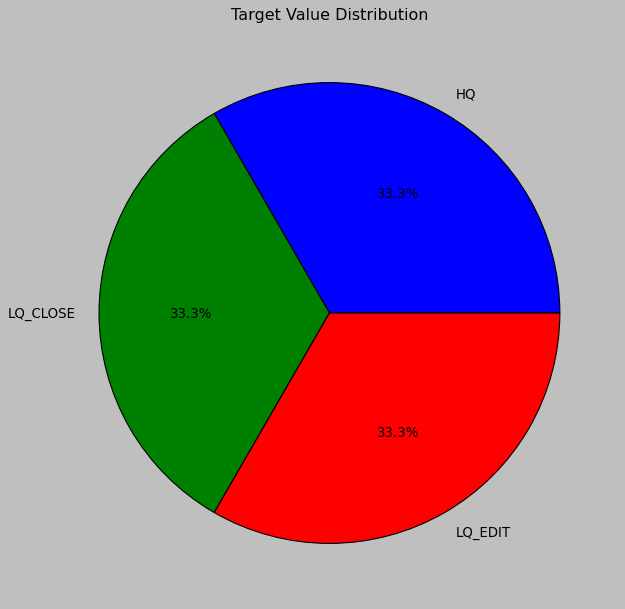

In [22]:
labels = ['HQ', 'LQ_CLOSE', 'LQ_EDIT']
values = [len(data[data['target'] == 0]), len(data[data['target'] == 1]), len(data[data['target'] == 2])]
plt.style.use('classic')
plt.figure(figsize=(16, 9))
plt.pie(x=values, labels=labels, autopct="%1.1f%%")
plt.title("Target Value Distribution")
plt.show()

Данные распределены равномерно по категориям текста.

Проведем очистку данных

# Разделение данных на тренировочную и тестовую выборки

In [23]:
def split(data):
    split_pcent = 0.25
    split = int(split_pcent * len(data))

    data = data.sample(frac=1).reset_index(drop=True)

    train = data[split:]
    trainX = train['text']
    trainY = train['target'].values

    test = data[:split]
    testX = test['text']
    testY = test['target'].values

    print(f"Training Data Shape: {trainX.shape}\nTest Data Shape: {testX.shape}")
    return trainX, trainY, testX, testY

trainX, trainY, testX, testY = split(data)

Training Data Shape: (36000,)
Test Data Shape: (12000,)


In [24]:
[len(trainY[trainY == 0]), len(trainY[trainY == 1]), len(trainY[trainY == 2])]

[11957, 12086, 11957]

# Векторизация данных

## 1. BOW (Bag of words)

In [25]:
def bow(train, test):
    bow_vectorizer = CountVectorizer()
    train_vec = bow_vectorizer.fit_transform(train)
    test_vec = bow_vectorizer.transform(test)
    return train_vec, test_vec

## 2. tf-idf

In [26]:
def tf_idf(train, test):
    tfidf_vectorizer = TfidfVectorizer()
    train_vec = tfidf_vectorizer.fit_transform(train)
    test_vec = tfidf_vectorizer.transform(test)

    return train_vec, test_vec

# Построение классификаторов


## 1. kNN

In [27]:
def knn_score(trainX, trainY, testX, testY):
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(trainX, trainY)
    return knn_classifier.score(testX, testY)

## 2. Random Forests

In [28]:
def random_forest_score(trainX, trainY, testX, testY):
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(trainX, trainY)
    return rf_classifier.score(testX, testY)

## 3. Логистическая регрессия

In [29]:
def lr_score(trainX, trainY, testX, testY):
    lr_classifier = LogisticRegression()
    lr_classifier.fit(trainX, trainY)
    return lr_classifier.score(testX, testY)

In [30]:
========================================================================================================================
========================================================================================================================
========================================================================================================================

SyntaxError: invalid syntax (<ipython-input-30-a6ef4eeeaba4>, line 1)

In [31]:
# data = data[:1000]

def visualize_results(score):
    print(score)

def base_pipeline(data, spliter, vectorizer, scorer):
    train_x, train_y, test_x, test_y = spliter(data)
    vectorized_train_x, vectorized_test_x = vectorizer(train_x, test_x)
    score = scorer(vectorized_train_x, train_y, vectorized_test_x, test_y)

    visualize_results(score)



# 1 attempt: basic cleaner, bow, knn 
base_pipeline(data, split, bow, random_forest_score)

Training Data Shape: (36000,)
Test Data Shape: (12000,)
0.8308333333333333


In [32]:
base_pipeline(data, split, bow, lr_score)

Training Data Shape: (36000,)
Test Data Shape: (12000,)
0.882


/home/agladyshev/anaconda3/envs/unn-nlp/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
base_pipeline(data, split, tf_idf, lr_score)

Training Data Shape: (36000,)
Test Data Shape: (12000,)
0.86975


/home/agladyshev/anaconda3/envs/unn-nlp/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
